<a href="https://colab.research.google.com/github/tiffkuang/FutureMakers2021/blob/main/Sarcasm_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# importing libraries

import pandas as pd
import seaborn as sns
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
# load the dataset

df = pd.read_json("/content/gdrive/MyDrive/dataset/Sarcasm_Headlines_Dataset.json", lines=True)
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


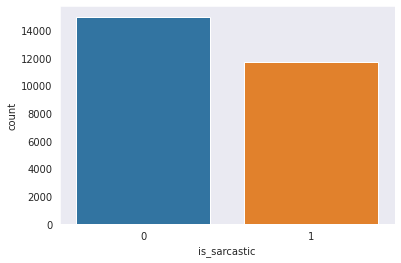

In [ ]:
# plot the class labels distribution
sns.set_style("dark")
sns.countplot(df.is_sarcastic)

In [ ]:
# print the number of data examples in each class
df.is_sarcastic.value_counts()

0    14985
1    11724
Name: is_sarcastic, dtype: int64

In [ ]:
# print the total number of data examples
len(df.is_sarcastic)

26709

In [ ]:
# define x and y
x = df.iloc[:, 1]
y = df.iloc[:, 2]
print(x)

0        former versace store clerk sues over secret 'b...
1        the 'roseanne' revival catches up to our thorn...
2        mom starting to fear son's web series closest ...
3        boehner just wants wife to listen, not come up...
4        j.k. rowling wishes snape happy birthday in th...
                               ...                        
26704                 american politics in moral free-fall
26705                              america's best 20 hikes
26706                                reparations and obama
26707    israeli ban targeting boycott supporters raise...
26708                    gourmet gifts for the foodie 2014
Name: headline, Length: 26709, dtype: object


In [ ]:
# split the dataset into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
len(x_train)

21367

In [ ]:
# data preprocessing
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
sequences = tok.texts_to_sequences(x_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)
sequences_matrix.shape

(21367, 150)

In [ ]:
np.amax(sequences_matrix)

999

In [ ]:
def RNN():
    inputs = Input(name='inputs', shape=[max_len])
    layer = Embedding(max_words, 50, input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256, name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(1, name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [ ]:
# compile the model
model = RNN()
model.summary()
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(), metrics=['accuracy'])

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257   

In [ ]:
# fit the model
history = model.fit(sequences_matrix, y_train, batch_size = 100, epochs = 5, validation_split = 0.1)

Epoch 1/5
193/193 [==============================] - 25s 15ms/step - loss: 0.7052 - accuracy: 0.6728 - val_loss: 0.4636 - val_accuracy: 0.7618
Epoch 2/5
193/193 [==============================] - 2s 11ms/step - loss: 0.4562 - accuracy: 0.8172 - val_loss: 0.4799 - val_accuracy: 0.8128
Epoch 3/5
193/193 [==============================] - 2s 11ms/step - loss: 0.4293 - accuracy: 0.8320 - val_loss: 0.4540 - val_accuracy: 0.8198
Epoch 4/5
193/193 [==============================] - 2s 11ms/step - loss: 4.5906 - accuracy: 0.6362 - val_loss: 8.5273 - val_accuracy: 0.4408
Epoch 5/5
193/193 [==============================] - 2s 11ms/step - loss: 8.5987 - accuracy: 0.4361 - val_loss: 8.5273 - val_accuracy: 0.4408


In [ ]:
# evaluate on test set
test_sequences = tok.texts_to_sequences(x_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen=max_len)
test_sequences_matrix.shape

(5342, 150)

In [ ]:
accr = model.evaluate(test_sequences_matrix, y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

167/167 [==============================] - 1s 5ms/step - loss: 8.5581 - accuracy: 0.4388
Test set
  Loss: 8.558
  Accuracy: 0.439
